In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 

data_file_path = '/content/drive/MyDrive/Colab Notebooks/iotdata_csvfiles/'
colnames = ['id','code','created_at','updated_at','email','device_name','value','subject_id','timestamp','resource_id',"device_id",'blank1',"log_time","blank2"]
data = pd.read_csv(data_file_path + 'myiot.csv',header=None,names=colnames)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1225 non-null   int64  
 1   code         1225 non-null   object 
 2   created_at   1225 non-null   object 
 3   updated_at   1225 non-null   object 
 4   email        1225 non-null   object 
 5   device_name  1225 non-null   object 
 6   value        1225 non-null   object 
 7   subject_id   1225 non-null   object 
 8   timestamp    1225 non-null   object 
 9   resource_id  1225 non-null   object 
 10  device_id    1225 non-null   object 
 11  blank1       0 non-null      float64
 12  log_time     1225 non-null   object 
 13  blank2       1225 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 134.1+ KB


In [ ]:
data['device_name'].unique()

array(['온도센서', '습도센서', '재실존재', '스마트큐브', '스마트조명 상단', '스마트조명 하단', '열림감지센서',
       '조도센서', '전동블라인드', '모션센서', '플러그'], dtype=object)

In [ ]:
data.head()


,id,code,created_at,updated_at,email,device_name,value,subject_id,timestamp,resource_id,device_id,blank1,log_time,blank2
0,1,LO0001,2022-08-16 21:52:34.177720,2022-08-16 21:52:34.177739,sotolabedu@gmail.com,온도센서,"{\value\"": 30.71","\""subjectId\"": \""lumi.4cf8cdf3c806c8b\""","\""timeStamp\"": 1660346530977","\""resourceId\"": \""0.1.85\""}""",lumi.sensor_ht.agl02,NaN,2022-08-13 08:22:10,\N
1,2,LO0002,2022-08-16 21:52:34.183214,2022-08-16 21:52:34.183231,sotolabedu@gmail.com,온도센서,"{\value\"": 30.51","\""subjectId\"": \""lumi.4cf8cdf3c806c8b\""","\""timeStamp\"": 1660349825123","\""resourceId\"": \""0.1.85\""}""",lumi.sensor_ht.agl02,NaN,2022-08-13 09:17:05,\N
2,3,LO0003,2022-08-16 21:52:34.187131,2022-08-16 21:52:34.187148,sotolabedu@gmail.com,온도센서,"{\value\"": 30.29","\""subjectId\"": \""lumi.4cf8cdf3c806c8b\""","\""timeStamp\"": 1660351056124","\""resourceId\"": \""0.1.85\""}""",lumi.sensor_ht.agl02,NaN,2022-08-13 09:37:36,\N
3,4,LO0004,2022-08-16 21:52:34.191634,2022-08-16 21:52:34.191648,sotolabedu@gmail.com,온도센서,"{\value\"": 30.15","\""subjectId\"": \""lumi.4cf8cdf3c806c8b\""","\""timeStamp\"": 1660353119187","\""resourceId\"": \""0.1.85\""}""",lumi.sensor_ht.agl02,NaN,2022-08-13 10:11:59,\N
4,5,LO0005,2022-08-16 21:52:34.196523,2022-08-16 21:52:34.196539,sotolabedu@gmail.com,온도센서,"{\value\"": 30.49","\""subjectId\"": \""lumi.4cf8cdf3c806c8b\""","\""timeStamp\"": 1660356413282","\""resourceId\"": \""0.1.85\""}""",lumi.sensor_ht.agl02,NaN,2022-08-13 11:06:53,\N


In [ ]:
data.drop(["id","code"],axis=1,inplace=True)

In [ ]:
def dummySplit(x):
 
  if x['device_name'] == '온도센서' or x['device_name']=="습도센서":
    value = x['value'][10:]
  else:
    value = x['value'][13:-2]

  return value

In [ ]:
data['value']=data.apply(dummySplit,axis=1)

In [ ]:
data[data["device_name"]=="스마트큐브"]['value'].unique()

array(['alert'], dtype=object)

In [ ]:
data['device_name'].unique()

array(['온도센서', '습도센서', '재실존재', '스마트큐브', '스마트조명 상단', '스마트조명 하단', '열림감지센서',
       '조도센서', '전동블라인드', '모션센서', '플러그'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   1225 non-null   object 
 1   updated_at   1225 non-null   object 
 2   email        1225 non-null   object 
 3   device_name  1225 non-null   object 
 4   value        1225 non-null   object 
 5   subject_id   1225 non-null   object 
 6   timestamp    1225 non-null   object 
 7   resource_id  1225 non-null   object 
 8   device_id    1225 non-null   object 
 9   blank1       0 non-null      float64
 10  log_time     1225 non-null   object 
 11  blank2       1225 non-null   object 
dtypes: float64(1), object(11)
memory usage: 115.0+ KB


In [ ]:
def subjectIdSplit(x):
 
  value = x['subject_id'][18:-2]

  return value

In [ ]:
data['subject_id']=data.apply(subjectIdSplit,axis=1)

In [ ]:
def timestampSplit(x):
 
  value = x['timestamp'][15:]

  return value

In [ ]:
data['timestamp']=data.apply(timestampSplit,axis=1)

In [ ]:
def resourceIdSplit(x):
 
  value = x['resource_id'][19:-4]

  return value

In [ ]:
data['resource_id']=data.apply(resourceIdSplit,axis=1)

In [ ]:
data.drop(['blank1','blank2'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   1225 non-null   object
 1   updated_at   1225 non-null   object
 2   email        1225 non-null   object
 3   device_name  1225 non-null   object
 4   value        1225 non-null   object
 5   subject_id   1225 non-null   object
 6   timestamp    1225 non-null   object
 7   resource_id  1225 non-null   object
 8   device_id    1225 non-null   object
 9   log_time     1225 non-null   object
dtypes: object(10)
memory usage: 95.8+ KB


In [ ]:
data.tail()

,created_at,updated_at,email,device_name,value,subject_id,timestamp,resource_id,device_id,log_time
1220,2022-08-19 15:13:27.469495,2022-08-19 15:13:27.469507,sotolabedu@gmail.com,조도센서,10,lumi.4cf8cdf3c8dc274,1660888282473,0.3.85,lumi.sen_ill.agl01,2022-08-19 14:51:22
1221,2022-08-19 15:13:27.473011,2022-08-19 15:13:27.473023,sotolabedu@gmail.com,조도센서,17,lumi.4cf8cdf3c8dc274,1660888701581,0.3.85,lumi.sen_ill.agl01,2022-08-19 14:58:21
1222,2022-08-19 15:13:27.477798,2022-08-19 15:13:27.477811,sotolabedu@gmail.com,조도센서,10,lumi.4cf8cdf3c8dc274,1660888915126,0.3.85,lumi.sen_ill.agl01,2022-08-19 15:01:55
1223,2022-08-19 15:13:27.481369,2022-08-19 15:13:27.481381,sotolabedu@gmail.com,조도센서,17,lumi.4cf8cdf3c8dc274,1660889054190,0.3.85,lumi.sen_ill.agl01,2022-08-19 15:04:14
1224,2022-08-19 15:13:27.489292,2022-08-19 15:13:27.489305,sotolabedu@gmail.com,조도센서,31,lumi.4cf8cdf3c8dc274,1660889436611,0.3.85,lumi.sen_ill.agl01,2022-08-19 15:10:36


In [ ]:
data.drop(['email','resource_id','device_id'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   1225 non-null   object
 1   updated_at   1225 non-null   object
 2   device_name  1225 non-null   object
 3   value        1225 non-null   object
 4   subject_id   1225 non-null   object
 5   timestamp    1225 non-null   object
 6   log_time     1225 non-null   object
dtypes: object(7)
memory usage: 67.1+ KB


In [ ]:
def nameConvert(x):

  new_name = ""
  if x['device_name'] == '모션센서':
    new_name = 'motion'
  elif x['device_name'] == '스마트조명 상단':
    new_name = 'lighting_upper'
  elif x['device_name'] == '스마트조명 하단':
    new_name = 'lighting_lower'
  elif x['device_name'] == '스마트큐브':
    new_name = 'cube'
  elif x['device_name'] == '습도센서':
    new_name = 'humidity'
  elif x['device_name'] == '열림감지센서':
    new_name = 'door'
  elif x['device_name'] == '온도센서':
    new_name = 'temperature'
  elif x['device_name'] == '재실존재':
    new_name = 'existence'
  elif x['device_name'] == '전동블라인드':
    new_name = 'rollershade' 
  elif x['device_name'] == '조도센서':
    new_name = 'illuminance'
  elif x['device_name'] == '플러그':
    new_name = 'plug'
  
  return new_name

In [ ]:
data['device_name']=data.apply(nameConvert,axis=1)

In [ ]:
data['2022-08-15' < data['log_time'] ]

,created_at,updated_at,device_name,value,subject_id,timestamp,log_time
51,2022-08-16 21:52:34.402567,2022-08-16 21:52:34.402583,temperature,30.22,lumi.4cf8cdf3c806c8b,1660491468754,2022-08-15 00:37:48
52,2022-08-16 21:52:34.406506,2022-08-16 21:52:34.406523,temperature,30.36,lumi.4cf8cdf3c806c8b,1660494762797,2022-08-15 01:32:42
53,2022-08-16 21:52:34.410726,2022-08-16 21:52:34.410741,temperature,30.49,lumi.4cf8cdf3c806c8b,1660498056718,2022-08-15 02:27:36
54,2022-08-16 21:52:34.415033,2022-08-16 21:52:34.415048,temperature,30.5,lumi.4cf8cdf3c806c8b,1660501350712,2022-08-15 03:22:30
55,2022-08-16 21:52:34.419443,2022-08-16 21:52:34.419460,temperature,30.58,lumi.4cf8cdf3c806c8b,1660504644794,2022-08-15 04:17:24
...,...,...,...,...,...,...,...
1220,2022-08-19 15:13:27.469495,2022-08-19 15:13:27.469507,illuminance,10,lumi.4cf8cdf3c8dc274,1660888282473,2022-08-19 14:51:22
1221,2022-08-19 15:13:27.473011,2022-08-19 15:13:27.473023,illuminance,17,lumi.4cf8cdf3c8dc274,1660888701581,2022-08-19 14:58:21
1222,2022-08-19 15:13:27.477798,2022-08-19 15:13:27.477811,illuminance,10,lumi.4cf8cdf3c8dc274,1660888915126,2022-08-19 15:01:55
1223,2022-08-19 15:13:27.481369,2022-08-19 15:13:27.481381,illuminance,17,lumi.4cf8cdf3c8dc274,1660889054190,2022-08-19 15:04:14


In [ ]:
data['log_time'].nunique()

1225

0    30.71
1    30.51
2    30.29
3    30.15
4    30.49
Name: temperature, dtype: float64

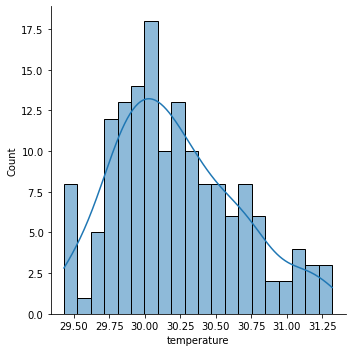

In [ ]:
temperature = data[data['device_name']=="temperature"]['value'].astype(float)
temperature.name = 'temperature'
sns.displot(data=temperature,bins=20,kde=True)
temperature.head()

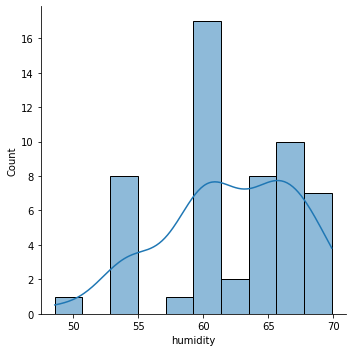

In [ ]:
humidity = data[data['device_name']=="humidity"]['value'].astype(float)
humidity.name = 'humidity'
sns.displot(data=humidity,bins=10,kde=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


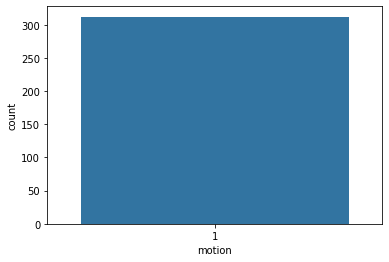

In [ ]:
motion = data[data['device_name']=="motion"]['value']
motion.name = 'motion'
sns.countplot(motion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


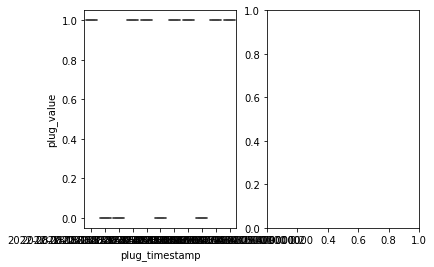

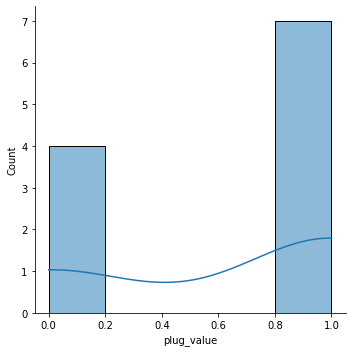

In [ ]:
from datetime import datetime
def time_convert(x):
  timestamp = x['timestamp']
  converted_date = datetime.fromtimestamp(timestamp/1000)
  # print(converted_date)
  return converted_date



plug_value = data[data['device_name']=="plug"]['value'].astype(int)
# data[data['device_name']=='plug']['timestamp'] = data[data['device_name']=="plug"]['timestamp'].astype(int)
subset_data = data[data['device_name']=='plug']
subset_data['timestamp'] = subset_data['timestamp'].astype(int)

plug_timestamp = subset_data.apply(time_convert,axis=1)
plug_timestamp = pd.Series(plug_timestamp)
plug_value.name = 'plug_value'
plug_timestamp.name = "plug_timestamp"


df_plug = pd.concat([plug_timestamp,plug_value],axis=1)

plt.subplot(1,2,1)
sns.boxplot(x='plug_timestamp', y="plug_value",data=df_plug)

plt.subplot(1,2,2)
sns.displot(data=df_plug,x = "plug_value",  kde=True)




In [ ]:
# print(type(k))
# data['timestamp'] =k
# data['timestamp']=data['timestamp'].astype(int)
# data[data['device_name']=='plug']['timestamp'] = k

In [ ]:
data.isnull().sum()

created_at     0
updated_at     0
device_name    0
value          0
subject_id     0
timestamp      0
log_time       0
dtype: int64

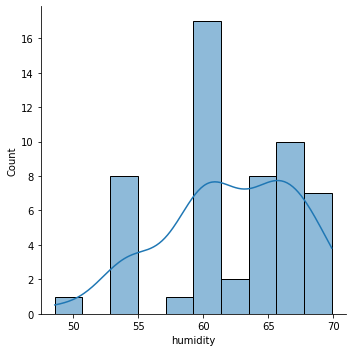

In [ ]:
motion = data[data['device_name']=="humidity"]['value'].astype(float)
humidity.name = 'humidity'
sns.displot(data=humidity,bins=10,kde=True)

In [ ]:
data

,created_at,updated_at,device_name,value,subject_id,timestamp,log_time
0,2022-08-16 21:52:34.177720,2022-08-16 21:52:34.177739,temperature,30.71,lumi.4cf8cdf3c806c8b,1660346530977,2022-08-13 08:22:10
1,2022-08-16 21:52:34.183214,2022-08-16 21:52:34.183231,temperature,30.51,lumi.4cf8cdf3c806c8b,1660349825123,2022-08-13 09:17:05
2,2022-08-16 21:52:34.187131,2022-08-16 21:52:34.187148,temperature,30.29,lumi.4cf8cdf3c806c8b,1660351056124,2022-08-13 09:37:36
3,2022-08-16 21:52:34.191634,2022-08-16 21:52:34.191648,temperature,30.15,lumi.4cf8cdf3c806c8b,1660353119187,2022-08-13 10:11:59
4,2022-08-16 21:52:34.196523,2022-08-16 21:52:34.196539,temperature,30.49,lumi.4cf8cdf3c806c8b,1660356413282,2022-08-13 11:06:53
...,...,...,...,...,...,...,...
1220,2022-08-19 15:13:27.469495,2022-08-19 15:13:27.469507,illuminance,10,lumi.4cf8cdf3c8dc274,1660888282473,2022-08-19 14:51:22
1221,2022-08-19 15:13:27.473011,2022-08-19 15:13:27.473023,illuminance,17,lumi.4cf8cdf3c8dc274,1660888701581,2022-08-19 14:58:21
1222,2022-08-19 15:13:27.477798,2022-08-19 15:13:27.477811,illuminance,10,lumi.4cf8cdf3c8dc274,1660888915126,2022-08-19 15:01:55
1223,2022-08-19 15:13:27.481369,2022-08-19 15:13:27.481381,illuminance,17,lumi.4cf8cdf3c8dc274,1660889054190,2022-08-19 15:04:14


# **One-hot Encoding**

In [ ]:
data = pd.get_dummies(data, columns=['device_name'],drop_first=False)

In [ ]:
data

,created_at,updated_at,value,subject_id,timestamp,log_time,device_name_cube,device_name_door,device_name_existence,device_name_humidity,device_name_illuminance,device_name_lighting_lower,device_name_lighting_upper,device_name_motion,device_name_plug,device_name_rollershade,device_name_temperature
0,2022-08-16 21:52:34.177720,2022-08-16 21:52:34.177739,30.71,lumi.4cf8cdf3c806c8b,1660346530977,2022-08-13 08:22:10,0,0,0,0,0,0,0,0,0,0,1
1,2022-08-16 21:52:34.183214,2022-08-16 21:52:34.183231,30.51,lumi.4cf8cdf3c806c8b,1660349825123,2022-08-13 09:17:05,0,0,0,0,0,0,0,0,0,0,1
2,2022-08-16 21:52:34.187131,2022-08-16 21:52:34.187148,30.29,lumi.4cf8cdf3c806c8b,1660351056124,2022-08-13 09:37:36,0,0,0,0,0,0,0,0,0,0,1
3,2022-08-16 21:52:34.191634,2022-08-16 21:52:34.191648,30.15,lumi.4cf8cdf3c806c8b,1660353119187,2022-08-13 10:11:59,0,0,0,0,0,0,0,0,0,0,1
4,2022-08-16 21:52:34.196523,2022-08-16 21:52:34.196539,30.49,lumi.4cf8cdf3c806c8b,1660356413282,2022-08-13 11:06:53,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2022-08-19 15:13:27.469495,2022-08-19 15:13:27.469507,10,lumi.4cf8cdf3c8dc274,1660888282473,2022-08-19 14:51:22,0,0,0,0,1,0,0,0,0,0,0
1221,2022-08-19 15:13:27.473011,2022-08-19 15:13:27.473023,17,lumi.4cf8cdf3c8dc274,1660888701581,2022-08-19 14:58:21,0,0,0,0,1,0,0,0,0,0,0
1222,2022-08-19 15:13:27.477798,2022-08-19 15:13:27.477811,10,lumi.4cf8cdf3c8dc274,1660888915126,2022-08-19 15:01:55,0,0,0,0,1,0,0,0,0,0,0
1223,2022-08-19 15:13:27.481369,2022-08-19 15:13:27.481381,17,lumi.4cf8cdf3c8dc274,1660889054190,2022-08-19 15:04:14,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# import numpy as np

# deviceList = ['device_name_cube', 'device_name_door','device_name_existence','device_name_humidity','device_name_illuminance','device_name_lighting_lower',
#               'device_name_lighting_upper','device_name_motion','device_name_plug','device_name_rollershade','device_name_temperature']
# for deviceName in deviceList:
#   naMaker = np.array(data[deviceName])
#   data[deviceName] = np.where(naMaker ==0, None, naMaker)



In [ ]:
deviceList = ['device_name_cube', 'device_name_door','device_name_existence','device_name_humidity','device_name_illuminance','device_name_lighting_lower',
              'device_name_lighting_upper','device_name_motion','device_name_plug','device_name_rollershade','device_name_temperature']
for deviceName in deviceList:
  naMaker = np.array(data[deviceName])
  data[deviceName] = np.where(naMaker ==0, None, naMaker*data['value'])

In [ ]:
data.head()

,created_at,updated_at,value,subject_id,timestamp,log_time,device_name_cube,device_name_door,device_name_existence,device_name_humidity,device_name_illuminance,device_name_lighting_lower,device_name_lighting_upper,device_name_motion,device_name_plug,device_name_rollershade,device_name_temperature
0,2022-08-16 21:52:34.177720,2022-08-16 21:52:34.177739,30.71,lumi.4cf8cdf3c806c8b,1660346530977,2022-08-13 08:22:10,None,None,None,None,None,None,None,None,None,None,30.71
1,2022-08-16 21:52:34.183214,2022-08-16 21:52:34.183231,30.51,lumi.4cf8cdf3c806c8b,1660349825123,2022-08-13 09:17:05,None,None,None,None,None,None,None,None,None,None,30.51
2,2022-08-16 21:52:34.187131,2022-08-16 21:52:34.187148,30.29,lumi.4cf8cdf3c806c8b,1660351056124,2022-08-13 09:37:36,None,None,None,None,None,None,None,None,None,None,30.29
3,2022-08-16 21:52:34.191634,2022-08-16 21:52:34.191648,30.15,lumi.4cf8cdf3c806c8b,1660353119187,2022-08-13 10:11:59,None,None,None,None,None,None,None,None,None,None,30.15
4,2022-08-16 21:52:34.196523,2022-08-16 21:52:34.196539,30.49,lumi.4cf8cdf3c806c8b,1660356413282,2022-08-13 11:06:53,None,None,None,None,None,None,None,None,None,None,30.49


In [ ]:
pd.get_option("display.max_columns")
data.head()

,created_at,updated_at,value,subject_id,timestamp,log_time,device_name_cube,device_name_door,device_name_existence,device_name_humidity,device_name_illuminance,device_name_lighting_lower,device_name_lighting_upper,device_name_motion,device_name_plug,device_name_rollershade,device_name_temperature
0,2022-08-16 21:52:34.177720,2022-08-16 21:52:34.177739,30.71,lumi.4cf8cdf3c806c8b,1660346530977,2022-08-13 08:22:10,None,None,None,None,None,None,None,None,None,None,30.71
1,2022-08-16 21:52:34.183214,2022-08-16 21:52:34.183231,30.51,lumi.4cf8cdf3c806c8b,1660349825123,2022-08-13 09:17:05,None,None,None,None,None,None,None,None,None,None,30.51
2,2022-08-16 21:52:34.187131,2022-08-16 21:52:34.187148,30.29,lumi.4cf8cdf3c806c8b,1660351056124,2022-08-13 09:37:36,None,None,None,None,None,None,None,None,None,None,30.29
3,2022-08-16 21:52:34.191634,2022-08-16 21:52:34.191648,30.15,lumi.4cf8cdf3c806c8b,1660353119187,2022-08-13 10:11:59,None,None,None,None,None,None,None,None,None,None,30.15
4,2022-08-16 21:52:34.196523,2022-08-16 21:52:34.196539,30.49,lumi.4cf8cdf3c806c8b,1660356413282,2022-08-13 11:06:53,None,None,None,None,None,None,None,None,None,None,30.49


In [ ]:
data.drop('device_name_cube', axis=1, inplace=True)

In [ ]:
# data.fillna(method="bfill", limit=1000, inplace=True)
data.fillna(method="ffill", limit=1000,inplace=True)

In [ ]:
deviceList = ['device_name_door','device_name_existence','device_name_humidity','device_name_illuminance','device_name_lighting_lower',
              'device_name_lighting_upper','device_name_motion','device_name_plug','device_name_rollershade','device_name_temperature']
for deviceName in deviceList:
  for notNullLocation in range(len(data)):
    temp = data[deviceName].isnull()[notNullLocation]
    if temp == False:
      print(f"{deviceName}:{data[deviceName][notNullLocation]}")
      if data[deviceName][notNullLocation] == '0':
        data[deviceName][0] = str(1)
      elif data[deviceName][notNullLocation] == '1':
        data[deviceName][0] = str(0)
      else:
        if deviceName == "device_name_illuminance":
          data[deviceName][0] = str(int(data[deviceName][notNullLocation]) + 1)
        else:
          data[deviceName][0] = str(float(data[deviceName][notNullLocation]) + 1)

      break

data.fillna(method="ffill", limit=1000,inplace=True)

device_name_door:0
device_name_existence:1
device_name_humidity: 54.95
device_name_illuminance:36
device_name_lighting_lower:1
device_name_lighting_upper:1
device_name_motion:1
device_name_plug:1
device_name_rollershade:1
device_name_temperature: 30.71


In [ ]:
from datetime import datetime
def time_convert(x):
  timestamp = x['timestamp']
  converted_date = datetime.fromtimestamp(int(timestamp)/1000)
  # print(converted_date)
  return converted_date


data['device_name_temperature']= data['device_name_temperature'].astype(float)
data['device_name_humidity']= data['device_name_humidity'].astype(float)
data['device_name_illuminance']= data['device_name_illuminance'].astype(int)
data['datetime'] = data.apply(time_convert, axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   created_at                  1225 non-null   object        
 1   updated_at                  1225 non-null   object        
 2   value                       1225 non-null   object        
 3   subject_id                  1225 non-null   object        
 4   timestamp                   1225 non-null   object        
 5   log_time                    1225 non-null   object        
 6   device_name_door            1225 non-null   object        
 7   device_name_existence       1225 non-null   object        
 8   device_name_humidity        1225 non-null   float64       
 9   device_name_illuminance     1225 non-null   int64         
 10  device_name_lighting_lower  1225 non-null   object        
 11  device_name_lighting_upper  1225 non-null   object      

In [ ]:
data.isnull().sum()

created_at                    0
updated_at                    0
value                         0
subject_id                    0
timestamp                     0
log_time                      0
device_name_door              0
device_name_existence         0
device_name_humidity          0
device_name_illuminance       0
device_name_lighting_lower    0
device_name_lighting_upper    0
device_name_motion            0
device_name_plug              0
device_name_rollershade       0
device_name_temperature       0
datetime                      0
dtype: int64

In [ ]:
data = data.drop(['log_time','created_at','updated_at','value','subject_id','timestamp'],axis=1)

In [ ]:
data

,device_name_door,device_name_existence,device_name_humidity,device_name_illuminance,device_name_lighting_lower,device_name_lighting_upper,device_name_motion,device_name_plug,device_name_rollershade,device_name_temperature,datetime
0,1,0,55.95,37,0,0,0,0,0,31.71,2022-08-12 23:22:10.977
1,1,0,55.95,37,0,0,0,0,0,30.51,2022-08-13 00:17:05.123
2,1,0,55.95,37,0,0,0,0,0,30.29,2022-08-13 00:37:36.124
3,1,0,55.95,37,0,0,0,0,0,30.15,2022-08-13 01:11:59.187
4,1,0,55.95,37,0,0,0,0,0,30.49,2022-08-13 02:06:53.282
...,...,...,...,...,...,...,...,...,...,...,...
1220,1,0,64.32,10,0,0,1,1,1,30.27,2022-08-19 05:51:22.473
1221,1,0,64.32,17,0,0,1,1,1,30.27,2022-08-19 05:58:21.581
1222,1,0,64.32,10,0,0,1,1,1,30.27,2022-08-19 06:01:55.126
1223,1,0,64.32,17,0,0,1,1,1,30.27,2022-08-19 06:04:14.190


In [ ]:
data['log_hour'] = int(0)
for step in range(len(data)):
  data['log_hour'][step] = data['datetime'][step].hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   device_name_door            1225 non-null   object        
 1   device_name_existence       1225 non-null   object        
 2   device_name_humidity        1225 non-null   float64       
 3   device_name_illuminance     1225 non-null   int64         
 4   device_name_lighting_lower  1225 non-null   object        
 5   device_name_lighting_upper  1225 non-null   object        
 6   device_name_motion          1225 non-null   object        
 7   device_name_plug            1225 non-null   object        
 8   device_name_rollershade     1225 non-null   object        
 9   device_name_temperature     1225 non-null   float64       
 10  datetime                    1225 non-null   datetime64[ns]
 11  log_hour                    1225 non-null   int64       

In [ ]:
data

,device_name_door,device_name_existence,device_name_humidity,device_name_illuminance,device_name_lighting_lower,device_name_lighting_upper,device_name_motion,device_name_plug,device_name_rollershade,device_name_temperature,datetime,log_hour
0,1,0,55.95,37,0,0,0,0,0,31.71,2022-08-12 23:22:10.977,23
1,1,0,55.95,37,0,0,0,0,0,30.51,2022-08-13 00:17:05.123,0
2,1,0,55.95,37,0,0,0,0,0,30.29,2022-08-13 00:37:36.124,0
3,1,0,55.95,37,0,0,0,0,0,30.15,2022-08-13 01:11:59.187,1
4,1,0,55.95,37,0,0,0,0,0,30.49,2022-08-13 02:06:53.282,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1220,1,0,64.32,10,0,0,1,1,1,30.27,2022-08-19 05:51:22.473,5
1221,1,0,64.32,17,0,0,1,1,1,30.27,2022-08-19 05:58:21.581,5
1222,1,0,64.32,10,0,0,1,1,1,30.27,2022-08-19 06:01:55.126,6
1223,1,0,64.32,17,0,0,1,1,1,30.27,2022-08-19 06:04:14.190,6


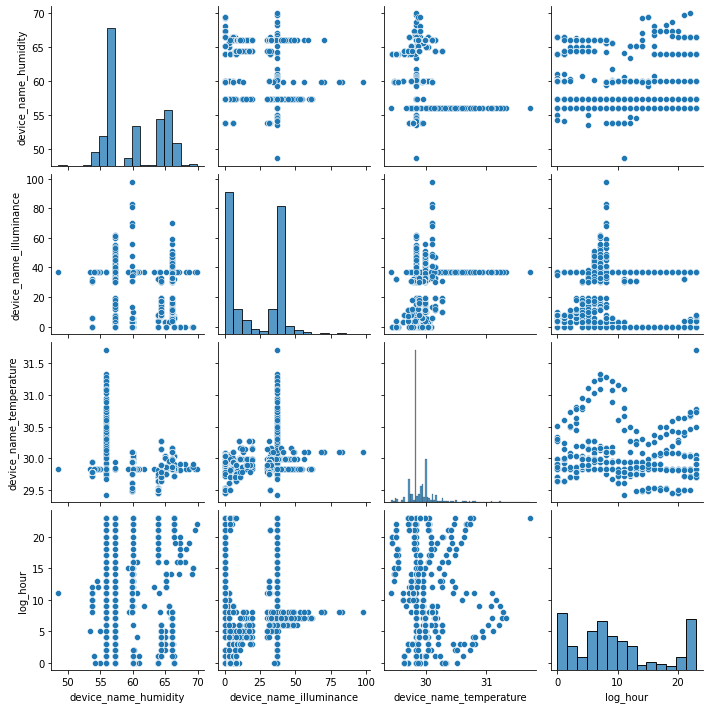

In [ ]:
sns.pairplot(data)

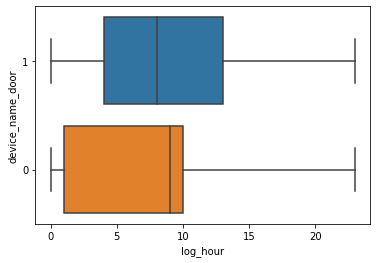

In [ ]:
sns.boxplot(data=data,x='log_hour', y='device_name_door')

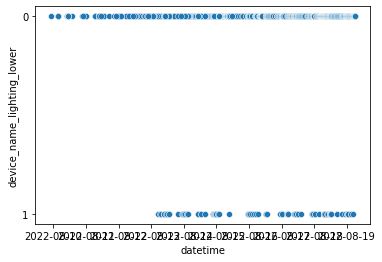

In [ ]:
sns.scatterplot(data=data, x='datetime',y='device_name_lighting_lower')

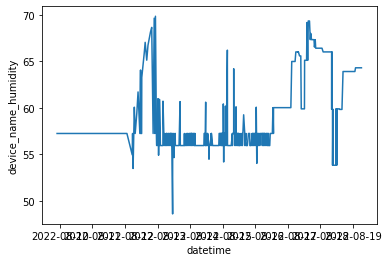

In [ ]:
sns.lineplot(data=data, x='datetime',y='device_name_humidity')

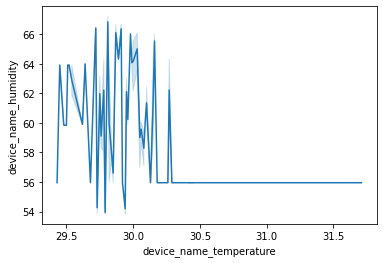

In [ ]:
sns.lineplot(data=data, x='device_name_temperature',y='device_name_humidity')

In [ ]:
data.groupby('log_hour')['device_name_door'].value_counts()

log_hour  device_name_door
0         1                   123
          0                     2
1         1                    68
          0                     4
2         1                    35
3         1                    47
4         1                    46
5         1                    73
6         1                    62
7         1                   105
8         1                    64
9         1                   113
          0                     3
10        1                    43
          0                     3
11        1                    54
12        1                    60
13        1                    23
14        1                    17
15        1                    13
16        1                    15
17        1                    11
18        1                     9
19        1                    12
20        1                    18
21        1                    28
22        1                    49
23        1                   124
          0          

In [ ]:
data.groupby('log_hour')['device_name_plug'].value_counts()

log_hour  device_name_plug
0         0                    88
          1                    37
1         0                    65
          1                     7
2         0                    32
          1                     3
3         0                    37
          1                    10
4         0                    27
          1                    19
5         0                    54
          1                    19
6         0                    58
          1                     4
7         0                   105
8         0                    64
9         0                   116
10        0                    46
11        0                    54
12        0                    60
13        0                    23
14        0                    17
15        0                    13
16        0                    15
17        0                    11
18        0                     9
19        0                    12
20        0                    18
21        0          

In [ ]:
data.groupby('log_hour')['device_name_lighting_lower'].value_counts()

log_hour  device_name_lighting_lower
0         0                             114
          1                              11
1         0                              69
          1                               3
2         0                              31
          1                               4
3         0                              42
          1                               5
4         0                              39
          1                               7
5         0                              72
          1                               1
6         0                              59
          1                               3
7         0                              97
          1                               8
8         0                              62
          1                               2
9         0                             109
          1                               7
10        0                              43
          1                            

In [ ]:
data.groupby('log_hour')['device_name_lighting_upper'].value_counts()

log_hour  device_name_lighting_upper
0         0                             125
1         0                              72
2         0                              34
          1                               1
3         0                              44
          1                               3
4         0                              40
          1                               6
5         0                              70
          1                               3
6         0                              57
          1                               5
7         0                              95
          1                              10
8         0                              63
          1                               1
9         0                             111
          1                               5
10        0                              43
          1                               3
11        0                              43
          1                            

In [ ]:
data.groupby('log_hour')['device_name_existence'].value_counts()

log_hour  device_name_existence
0         0                        116
          1                          9
1         0                         64
          1                          8
2         0                         32
          1                          3
3         0                         44
          1                          3
4         0                         46
5         0                         70
          1                          3
6         0                         62
7         0                        101
          1                          4
8         0                         63
          1                          1
9         0                        110
          1                          6
10        0                         45
          1                          1
11        0                         48
          1                          6
12        0                         49
          1                         11
13        0                     

In [ ]:
data.groupby('log_hour')['device_name_motion'].value_counts()

log_hour  device_name_motion
0         1                     86
          0                     39
1         1                     38
          0                     34
2         0                     21
          1                     14
3         1                     26
          0                     21
4         1                     38
          0                      8
5         1                     59
          0                     14
6         1                     47
          0                     15
7         0                     60
          1                     45
8         1                     40
          0                     24
9         1                     71
          0                     45
10        0                     29
          1                     17
11        1                     33
          0                     21
12        1                     37
          0                     23
13        1                     14
          0               

In [ ]:
data.to_csv("preprocessed_myiot.csv")